There are 3 main sections here: 1) Creating the Neo4j Knowledge Graph, 2) Visualizing Selected Common Pathways in Neo4j 3) Visualizing Selected Common Pathways in Python

In [3]:
import json 
import pandas as pd
import seaborn as sns

# 1) Creating the Neo4j Knowledge Graph
Neo4j commands, not Python

### Neo4j Implemetation

In [ ]:
CREATE CONSTRAINT UniqueProteinIdConstraint ON (p:Protein) ASSERT p.id IS UNIQUE;
CREATE CONSTRAINT UniquePathwayIdConstraint ON (pw:Pathway) ASSERT pw.id IS UNIQUE;

### Creating: Protein Nodes

In [ ]:
LOAD CSV WITH HEADERS FROM 'file:///protein-nodes.csv' as row
MERGE (p:Protein {id:row.ID})
ON CREATE SET
p.name = row.name,
p.synonyms = row.synonyms, 
p.LHON = row.LHON,
p.MELAS = row.MELAS,
p.ADOA = row.ADOA,
p.Leigh = row.Leigh,
p.MERRF = row.MERRF,
p.KSS = row.KSS,
p.Alpers = row.Alpers,
p.LBSL = row.LBSL,
p.PDD = row.PDD,
p.PEO = row.PEO,
p.MS = row.MS,
p.Parkin = row.Parkin,
p.ALS = row.ALS,
p.AD = row.AD,
p.Epil = row.Epil,
p.Schiz = row.Schiz,
p.FA = row.FA,
p.HSP = row.HSP,
p.WD = row.WD

### Creating: Pathway to Proteins

In [ ]:
LOAD CSV WITH HEADERS FROM
  'file:///pw2proteins.csv' as row
MERGE (pw:Pathway {id:row.ID})
     ON CREATE SET
         pw.name = row.name

In [ ]:
LOAD CSV WITH HEADERS FROM
   'file:///pw2proteins.csv' as row
MATCH (pw:Pathway{id:row.ID})
MATCH (p:Protein{id:row.protein})
MERGE (pw)-[:INVOLVES]->(p)

### Creating: Proteins --(INTERACTS_WITH)--> Protein

In [ ]:
LOAD CSV WITH HEADERS FROM
    'file:///proteins2proteins.csv' as row
MATCH (P:Protein{id:row.Protein})
MATCH (p:Protein{id:row.Interacts})
MERGE (P)-[:INTERACTS_WITH]->(p)

# FILE: 
# Interact 2nd col "ID", Interact 2nd col "name", Interact 1st col "protein"

--------

- Visualize the schema

In [ ]:
CALL db.schema.visualization

# 2) Neo4j: Identifying Protein-Pathway Relationships

#### Cluster 1 (LHON)

In [ ]:
MATCH path = (p1:Protein)--(pw:Pathway)--(p2:Protein)  
WHERE p1.id in ['Q16611','O60238','Q9H300','Q9NX14','P03901','P03886','P03905','P03923','Q9Y2Z4','Q8WWV3','Q8NBN7','P49590','Q9HD33','O75600','P03915','Q16795'] 
AND p2.id in ['Q16611','O60238','Q9H300','Q9NX14','P03901','P03886','P03905','P03923','Q9Y2Z4','Q8WWV3','Q8NBN7','P49590','Q9HD33','O75600','P03915','Q16795']
RETURN path LIMIT 1000

### Cluster 2 All diseases except LBSL, PDD (1-3); MELAS, Leigh, MS, AD, KSS (1-4)

In [ ]:
MATCH path = (p1:Protein)--(pw:Pathway)--(p2:Protein)  
WHERE p1.id in ['P20674','P10176','P36551','P00414']
AND p2.id in ['P20674','P10176','P36551','P00414']
RETURN path LIMIT 1000

### Cluster 3 ADOA (all 5); LHON, Leigh, MS, HSP (1 & 3); PEO, Parkin, ALS, AD, Epil (3), Schiz (2,3), WD (2)  (CLUSTER)

In [ ]:
MATCH path = (p1:Protein)--(pw:Pathway)--(p2:Protein)  
WHERE p1.id in ['Q9H6K4','Q04837','O60313','O43169','Q9H061']
AND p2.id in ['Q9H6K4','Q04837','O60313','O43169','Q9H061']
RETURN path LIMIT 1000

### Cluster 4 KSS (all 8); MELAS, Leigh, PEO (1, 6-8), ; (Weaker cluster)

In [ ]:
MATCH path = (p1:Protein)--(pw:Pathway)--(p2:Protein)  
WHERE p1.id in ['P00156','Q9H0U6','O95168','P12694','Q8NI60','P31040','P21912','Q9UDR5']
AND p2.id in ['P00156','Q9H0U6','O95168','P12694','Q8NI60','P31040','P21912','Q9UDR5']
RETURN path LIMIT 1000

### Cluster 5 
A large swath of similarity for MS, Parkin, ALS, AD, Epil, Schiz across a wide array of mitochondrial proteins. In the spots where there are zero CaseOLAP scores in one disease this section but not in the others, this may indicate that the protein is but has not yet been discovered to be relevant to this disease process. (Proteins in rows 147-333)
One of the highest scoring clustered proteins here are below (highest in AD and Parkin).

In [ ]:
MATCH path = (p1:Protein)--(pw:Pathway)--(p2:Protein)  
WHERE p1.id in ['P10415','Q07812','Q9Y2S7','P42574']
AND p2.id in ['P10415','Q07812','Q9Y2S7','P42574']
RETURN path LIMIT 1000

### Cluster 6
Schiz, Epil, AD (all), Parkin (last 3) (strongish cluster)

In [ ]:
MATCH path = (p1:Protein)--(pw:Pathway)--(p2:Protein)  
WHERE p1.id in ['Q8IVH4','Q9UF12','Q8N3J5','O43272','O15229','Q13423','Q8WUD6']
AND p2.id in ['Q8IVH4','Q9UF12','Q8N3J5','O43272','O15229','Q13423','Q8WUD6']
RETURN path LIMIT 1000

--------

# 3) Python: Identifying Protein-Pathway Relationships

In [4]:
pathways = pd.read_csv('data/pw2proteins.csv')
pathways.head()

,Unnamed: 0,num,ID,name,protein
0,0,0,R-HSA-1268020,Mitochondrial protein import,O75746
1,1,1,R-HSA-1268020,Mitochondrial protein import,Q96H96
2,2,2,R-HSA-1268020,Mitochondrial protein import,Q9Y584
3,3,3,R-HSA-1268020,Mitochondrial protein import,P56277
4,4,4,R-HSA-1268020,Mitochondrial protein import,Q9BVV7


#### Cluster 1 (LHON)

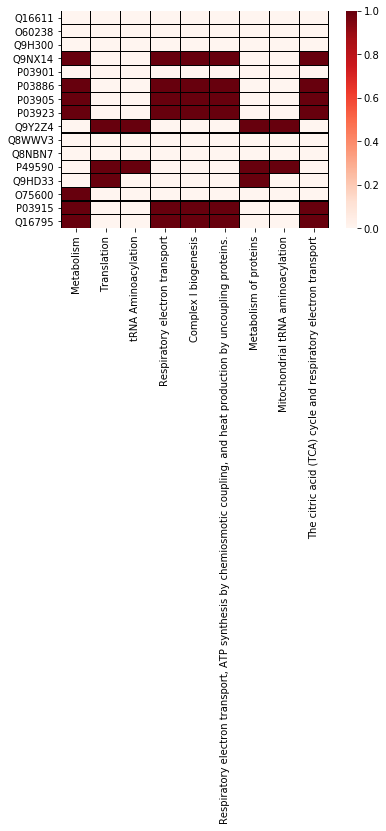

In [24]:
# LHON cluster
cluster1 = ['Q16611','O60238','Q9H300','Q9NX14','P03901','P03886','P03905','P03923','Q9Y2Z4','Q8WWV3','Q8NBN7','P49590','Q9HD33','O75600','P03915','Q16795']
pathway_cluster1 = {}

#or find a way to return all the indices where a protein exists

for ID in cluster1:
    pw_list = []
    for i in range(0,len(pathways)):
        if(ID == pathways['protein'][i]):
            pw_list.append(pathways['name'][i])
    pathway_cluster1[ID] = pw_list

#OUTPUT: pathway_cluster1 is a dictionary of ProteinID:[pathway,...]

common_pathway_cluster1 = {}  #Stores ProteinID:[common pathway shared by 1+ other protein,...]
all_common_pathways1 = set()  #Set of all pathways among all proteins

for ID,pws in pathway_cluster1.items():
    
    # Collect pathways of all other proteins
    other_pws = set()
    for ID2,pws2 in pathway_cluster1.items():
        if(ID2 != ID):
            for pw2 in pws2:
                other_pws.add(pw2)
    
    # Find the pathways shared between current protein and 1+ other protein(s)
    common_pws = []
    for pw in pws:
        if(pw in other_pws):
            common_pws.append(pw)
    common_pathway_cluster1[ID] = set(common_pws)

    # Add to a set of any pathway that involves at least 2 of these proteins
    all_common_pathways1 = all_common_pathways1.union(set(common_pws))         


# Make the dataframe and plot it as a binary heatmap 
df1 = pd.DataFrame(columns = list(all_common_pathways1))
#df1.rename(columns = {'Respiratory electron transport, ATP synthesis by chemiosmotic coupling, and heat production by uncoupling proteins.': 'RET, ATP syn by CC, HP by UP','The citric acid (TCA) cycle and respiratory electron transport': 'TCA and RET','Mitochondrial tRNA aminoacylation': 'Mito. tRNA aminoacylation'}, inplace = True)
for ID,PWS in pathway_cluster1.items():
    row = {}    
    for pw in df1.columns:
        if(pw in PWS): row.update({pw: 1.0})
        else: row.update({pw: 0.0})
    df1 = df1.append(row, ignore_index = True)
df1
df1.index = pathway_cluster1
hm = sns.heatmap(df1, cmap = 'Reds', linewidths=.1, linecolor='black')

In [14]:
common_pathway_cluster1

{'O60238': set(),
 'O75600': {'Metabolism'},
 'P03886': {'Complex I biogenesis',
  'Metabolism',
  'Respiratory electron transport',
  'Respiratory electron transport, ATP synthesis by chemiosmotic coupling, and heat production by uncoupling proteins.',
  'The citric acid (TCA) cycle and respiratory electron transport'},
 'P03901': set(),
 'P03905': {'Complex I biogenesis',
  'Metabolism',
  'Respiratory electron transport',
  'Respiratory electron transport, ATP synthesis by chemiosmotic coupling, and heat production by uncoupling proteins.',
  'The citric acid (TCA) cycle and respiratory electron transport'},
 'P03915': {'Complex I biogenesis',
  'Metabolism',
  'Respiratory electron transport',
  'Respiratory electron transport, ATP synthesis by chemiosmotic coupling, and heat production by uncoupling proteins.',
  'The citric acid (TCA) cycle and respiratory electron transport'},
 'P03923': {'Complex I biogenesis',
  'Metabolism',
  'Respiratory electron transport',
  'Respiratory 

### Cluster 2 Leigh, KSS, PEO, AD

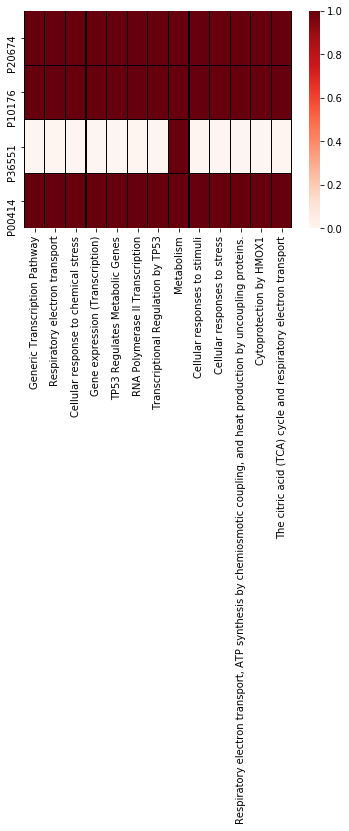

In [27]:
# Leigh, KSS, PEO, AD cluster
cluster2 = ['P20674','P10176','P36551','P00414']

pathway_cluster2 = {}

#or find a way to return all the indices where a protein exists

for ID in cluster2:
    pw_list = []
    for i in range(0,len(pathways)):
        if(ID == pathways['protein'][i]):
            pw_list.append(pathways['name'][i])
    pathway_cluster2[ID] = pw_list

#OUTPUT: pathway_cluster2 is a dictionary of ProteinID:[pathway,...]

common_pathway_cluster2 = {}  #Stores ProteinID:[common pathway shared by 1+ other protein,...]
all_common_pathways2 = set()  #Set of all pathways among all proteins

for ID,pws in pathway_cluster2.items():
    
    # Collect pathways of all other proteins
    other_pws = set()
    for ID2,pws2 in pathway_cluster2.items():
        if(ID2 != ID):
            for pw2 in pws2:
                other_pws.add(pw2)
    
    # Find the pathways shared between current protein and 1+ other protein(s)
    common_pws = []
    for pw in pws:
        if(pw in other_pws):
            common_pws.append(pw)
    common_pathway_cluster2[ID] = set(common_pws)

    # Add to a set of any pathway that involves at least 2 of these proteins
    all_common_pathways2 = all_common_pathways2.union(set(common_pws))
    
    

# Make the dataframe and plot it as a binary heatmap 
df1 = pd.DataFrame(columns = list(all_common_pathways2))
#df1.rename(columns = {'Respiratory electron transport, ATP synthesis by chemiosmotic coupling, and heat production by uncoupling proteins.': 'RET, ATP syn by CC, HP by UP','The citric acid (TCA) cycle and respiratory electron transport': 'TCA and RET','Mitochondrial tRNA aminoacylation': 'Mito. tRNA aminoacylation'}, inplace = True)

for ID,PWS in pathway_cluster2.items():
    row = {}    
    for pw in df1.columns:
        if(pw in PWS): row.update({pw: 1.0})
        else: row.update({pw: 0.0})
    df1 = df1.append(row, ignore_index = True)
df1
df1.index = pathway_cluster2
hm = sns.heatmap(df1, cmap = 'Reds', linewidths=.1, linecolor='black')

In [198]:
common_pathway_cluster2

{'P00414': {'Cellular response to chemical stress',
  'Cellular responses to stimuli',
  'Cellular responses to stress',
  'Cytoprotection by HMOX1',
  'Gene expression (Transcription)',
  'Generic Transcription Pathway',
  'Metabolism',
  'RNA Polymerase II Transcription',
  'Respiratory electron transport',
  'Respiratory electron transport, ATP synthesis by chemiosmotic coupling, and heat production by uncoupling proteins.',
  'TP53 Regulates Metabolic Genes',
  'The citric acid (TCA) cycle and respiratory electron transport',
  'Transcriptional Regulation by TP53'},
 'P10176': {'Cellular response to chemical stress',
  'Cellular responses to stimuli',
  'Cellular responses to stress',
  'Cytoprotection by HMOX1',
  'Gene expression (Transcription)',
  'Generic Transcription Pathway',
  'Metabolism',
  'RNA Polymerase II Transcription',
  'Respiratory electron transport',
  'Respiratory electron transport, ATP synthesis by chemiosmotic coupling, and heat production by uncoupling pro

### Cluster 3 ADOA (all 5); LHON, Leigh, MS, HSP (1 & 3); PEO, Parkin, ALS, AD, Epil (3), Schiz (2,3), WD (2)  (CLUSTER)

In [5]:
# Leigh, KSS, PEO, AD cluster
cluster3 = ['Q9H6K4','Q04837','O60313','O43169','Q9H061']

pathway_cluster3 = {}

#or find a way to return all the indices where a protein exists

for ID in cluster3:
    pw_list = []
    for i in range(0,len(pathways)):
        if(ID == pathways['protein'][i]):
            pw_list.append(pathways['name'][i])
    pathway_cluster3[ID] = pw_list

#OUTPUT: pathway_cluster3 is a dictionary of ProteinID:[pathway,...]

common_pathway_cluster3 = {}  #Stores ProteinID:[common pathway shared by 1+ other protein,...]
all_common_pathways1 = set()  #Set of all pathways among all proteins

for ID,pws in pathway_cluster3.items():
    
    # Collect pathways of all other proteins
    other_pws = set()
    for ID2,pws2 in pathway_cluster3.items():
        if(ID2 != ID):
            for pw2 in pws2:
                other_pws.add(pw2)
    
    # Find the pathways shared between current protein and 1+ other protein(s)
    common_pws = []
    for pw in pws:
        if(pw in other_pws):
            common_pws.append(pw)
    common_pathway_cluster3[ID] = set(common_pws)

    # Add to a set of any pathway that involves at least 2 of these proteins
    all_common_pathways1 = all_common_pathways1.union(set(common_pws))
    
# Make the dataframe and plot it as a binary heatmap 
df1 = pd.DataFrame(columns = list(all_common_pathways1))

for ID,PWS in pathway_cluster3.items():
    row = {}    
    for pw in df1.columns:
        if(pw in PWS): row.update({pw: 1.0})
        else: row.update({pw: 0.0})
    df1 = df1.append(row, ignore_index = True)
df1
df1.index = pathway_cluster3
hm = sns.heatmap(df1, cmap = 'Reds', linewidths=.1, linecolor='black')

ValueError: zero-size array to reduction operation minimum which has no identity

In [6]:
common_pathway_cluster3

{'O43169': set(),
 'O60313': set(),
 'Q04837': set(),
 'Q9H061': set(),
 'Q9H6K4': set()}

### Cluster 4 KSS (all 8); MELAS, Leigh, PEO (1, 6-8), ; (Weaker cluster)

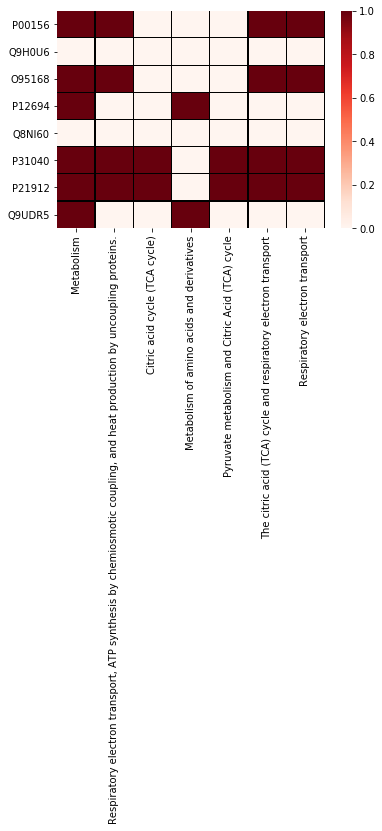

In [37]:
# Leigh, KSS, PEO, AD cluster
cluster4 = ['P00156','Q9H0U6','O95168','P12694','Q8NI60','P31040','P21912','Q9UDR5']


pathway_cluster4 = {}

#or find a way to return all the indices where a protein exists

for ID in cluster4:
    pw_list = []
    for i in range(0,len(pathways)):
        if(ID == pathways['protein'][i]):
            pw_list.append(pathways['name'][i])
    pathway_cluster4[ID] = pw_list

#OUTPUT: pathway_cluster4 is a dictionary of ProteinID:[pathway,...]

common_pathway_cluster4 = {}  #Stores ProteinID:[common pathway shared by 1+ other protein,...]
all_common_pathways1 = set()  #Set of all pathways among all proteins

for ID,pws in pathway_cluster4.items():
    
    # Collect pathways of all other proteins
    other_pws = set()
    for ID2,pws2 in pathway_cluster4.items():
        if(ID2 != ID):
            for pw2 in pws2:
                other_pws.add(pw2)
    
    # Find the pathways shared between current protein and 1+ other protein(s)
    common_pws = []
    for pw in pws:
        if(pw in other_pws):
            common_pws.append(pw)
    common_pathway_cluster4[ID] = set(common_pws)

    # Add to a set of any pathway that involves at least 2 of these proteins
    all_common_pathways1 = all_common_pathways1.union(set(common_pws))
    
# Make the dataframe and plot it as a binary heatmap 
df1 = pd.DataFrame(columns = list(all_common_pathways1))
#df1.rename(columns = {'Pyruvate metabolism and Citric Acid (TCA) cycle': 'Pyruvate metabolism and TCA','The citric acid (TCA) cycle and respiratory electron transport':'TCA and RET','Respiratory electron transport, ATP synthesis by chemiosmotic coupling, and heat production by uncoupling proteins.': 'RET, ATP syn by CC, HP by UP',}, inplace = True)

for ID,PWS in pathway_cluster4.items():
    row = {}    
    for pw in df1.columns:
        if(pw in PWS): row.update({pw: 1.0})
        else: row.update({pw: 0.0})
    df1 = df1.append(row, ignore_index = True)
df1
df1.index = pathway_cluster4
hm = sns.heatmap(df1, cmap = 'Reds', linewidths=.1, linecolor='black')

In [188]:
common_pathway_cluster4

{'O95168': {'Metabolism',
  'Respiratory electron transport',
  'Respiratory electron transport, ATP synthesis by chemiosmotic coupling, and heat production by uncoupling proteins.',
  'The citric acid (TCA) cycle and respiratory electron transport'},
 'P00156': {'Metabolism',
  'Respiratory electron transport',
  'Respiratory electron transport, ATP synthesis by chemiosmotic coupling, and heat production by uncoupling proteins.',
  'The citric acid (TCA) cycle and respiratory electron transport'},
 'P12694': {'Metabolism', 'Metabolism of amino acids and derivatives'},
 'P21912': {'Citric acid cycle (TCA cycle)',
  'Metabolism',
  'Pyruvate metabolism and Citric Acid (TCA) cycle',
  'Respiratory electron transport',
  'Respiratory electron transport, ATP synthesis by chemiosmotic coupling, and heat production by uncoupling proteins.',
  'The citric acid (TCA) cycle and respiratory electron transport'},
 'P31040': {'Citric acid cycle (TCA cycle)',
  'Metabolism',
  'Pyruvate metabolism 

### Cluster 5 
A large swath of similarity for MS, Parkin, ALS, AD, Epil, Schiz across a wide array of mitochondrial proteins. In the spots where there are zero CaseOLAP scores in one disease this section but not in the others, this may indicate that the protein is but has not yet been discovered to be relevant to this disease process. (Proteins in rows 147-333)
One of the highest scoring clustered proteins here are below (highest in AD and Parkin).

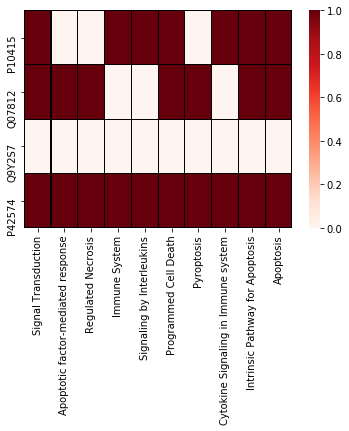

In [29]:
# Leigh, KSS, PEO, AD cluster
cluster5 = ['P10415','Q07812','Q9Y2S7','P42574']


pathway_cluster5 = {}

#or find a way to return all the indices where a protein exists

for ID in cluster5:
    pw_list = []
    for i in range(0,len(pathways)):
        if(ID == pathways['protein'][i]):
            pw_list.append(pathways['name'][i])
    pathway_cluster5[ID] = pw_list

#OUTPUT: pathway_cluster5 is a dictionary of ProteinID:[pathway,...]

common_pathway_cluster5 = {}  #Stores ProteinID:[common pathway shared by 1+ other protein,...]
all_common_pathways1 = set()  #Set of all pathways among all proteins

for ID,pws in pathway_cluster5.items():
    
    # Collect pathways of all other proteins
    other_pws = set()
    for ID2,pws2 in pathway_cluster5.items():
        if(ID2 != ID):
            for pw2 in pws2:
                other_pws.add(pw2)
    
    # Find the pathways shared between current protein and 1+ other protein(s)
    common_pws = []
    for pw in pws:
        if(pw in other_pws):
            common_pws.append(pw)
    common_pathway_cluster5[ID] = set(common_pws)

    # Add to a set of any pathway that involves at least 2 of these proteins
    all_common_pathways1 = all_common_pathways1.union(set(common_pws))
    
# Make the dataframe and plot it as a binary heatmap 
df1 = pd.DataFrame(columns = list(all_common_pathways1))

for ID,PWS in pathway_cluster5.items():
    row = {}    
    for pw in df1.columns:
        if(pw in PWS): row.update({pw: 1.0})
        else: row.update({pw: 0.0})
    df1 = df1.append(row, ignore_index = True)
df1
df1.index = pathway_cluster5
hm = sns.heatmap(df1, cmap = 'Reds', linewidths=.1, linecolor='black')

In [190]:
common_pathway_cluster5

{'P10415': {'Apoptosis',
  'Cytokine Signaling in Immune system',
  'Immune System',
  'Intrinsic Pathway for Apoptosis',
  'Programmed Cell Death',
  'Signal Transduction',
  'Signaling by Interleukins'},
 'P42574': {'Apoptosis',
  'Apoptotic factor-mediated response',
  'Cytokine Signaling in Immune system',
  'Immune System',
  'Intrinsic Pathway for Apoptosis',
  'Programmed Cell Death',
  'Pyroptosis',
  'Regulated Necrosis',
  'Signal Transduction',
  'Signaling by Interleukins'},
 'Q07812': {'Apoptosis',
  'Apoptotic factor-mediated response',
  'Intrinsic Pathway for Apoptosis',
  'Programmed Cell Death',
  'Pyroptosis',
  'Regulated Necrosis',
  'Signal Transduction'},
 'Q9Y2S7': set()}

### Cluster 6
Schiz, Epil, AD (all), Parkin (last 3) (strongish cluster)

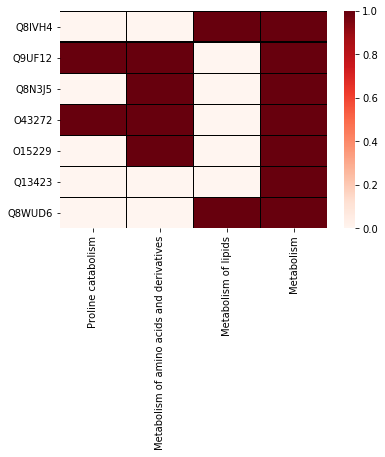

In [191]:
# Leigh, KSS, PEO, AD cluster
cluster6 = ['Q8IVH4','Q9UF12','Q8N3J5','O43272','O15229','Q13423','Q8WUD6']


pathway_cluster6 = {}

#or find a way to return all the indices where a protein exists

for ID in cluster6:
    pw_list = []
    for i in range(0,len(pathways)):
        if(ID == pathways['protein'][i]):
            pw_list.append(pathways['name'][i])
    pathway_cluster6[ID] = pw_list

#OUTPUT: pathway_cluster6 is a dictionary of ProteinID:[pathway,...]

common_pathway_cluster6 = {}  #Stores ProteinID:[common pathway shared by 1+ other protein,...]
all_common_pathways1 = set()  #Set of all pathways among all proteins

for ID,pws in pathway_cluster6.items():
    
    # Collect pathways of all other proteins
    other_pws = set()
    for ID2,pws2 in pathway_cluster6.items():
        if(ID2 != ID):
            for pw2 in pws2:
                other_pws.add(pw2)
    
    # Find the pathways shared between current protein and 1+ other protein(s)
    common_pws = []
    for pw in pws:
        if(pw in other_pws):
            common_pws.append(pw)
    common_pathway_cluster6[ID] = set(common_pws)

    # Add to a set of any pathway that involves at least 2 of these proteins
    all_common_pathways1 = all_common_pathways1.union(set(common_pws))
    
# Make the dataframe and plot it as a binary heatmap 
df1 = pd.DataFrame(columns = list(all_common_pathways1))

for ID,PWS in pathway_cluster6.items():
    row = {}    
    for pw in df1.columns:
        if(pw in PWS): row.update({pw: 1.0})
        else: row.update({pw: 0.0})
    df1 = df1.append(row, ignore_index = True)
df1
df1.index = pathway_cluster6
hm = sns.heatmap(df1, cmap = 'Reds', linewidths=.1, linecolor='black')

In [193]:
common_pathway_cluster6

{'O15229': {'Metabolism', 'Metabolism of amino acids and derivatives'},
 'O43272': {'Metabolism',
  'Metabolism of amino acids and derivatives',
  'Proline catabolism'},
 'Q13423': {'Metabolism'},
 'Q8IVH4': {'Metabolism', 'Metabolism of lipids'},
 'Q8N3J5': {'Metabolism', 'Metabolism of amino acids and derivatives'},
 'Q8WUD6': {'Metabolism', 'Metabolism of lipids'},
 'Q9UF12': {'Metabolism',
  'Metabolism of amino acids and derivatives',
  'Proline catabolism'}}

### Clear Graph Database (When Needed!)

- Conform APOC is available

In [ ]:
CALL dbms.procedures()
YIELD name WHERE name STARTS WITH "apoc"
RETURN name

- Clear database

In [ ]:
// Delete all constraints and indexes
CALL apoc.schema.assert({},{},true);
// Delete all nodes and relationships
CALL apoc.periodic.iterate('MATCH (n) RETURN n','DETACH DELETE n',{batchSize:500})